## Importing relevant libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [7]:
hb=pd.read_csv('hotel_bookings.csv')

## EDA

#### Dealing with missing values

In [25]:
hb.isnull().sum()
hb.dropna(inplace=True)

#### Brief summary of unique values per column

In [8]:
for col in hb.describe(include='object').columns:
    print(col)
    print(hb[col].unique())
    print('-'*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

#### Creating a comprehensive date column

In [20]:
def date_combiner(dataframe,day_col,month_col,year_col):
    return dataframe[day_col].astype('str') + '-' + dataframe[month_col].astype('str') + '-' + dataframe[year_col].astype('str')
hb['Date'] = date_combiner(hb,'arrival_date_day_of_month','arrival_date_month','arrival_date_year')
hb['Date'] = pd.to_datetime(hb['Date'])
hb.drop(columns=['arrival_date_day_of_month','arrival_date_month','arrival_date_year'], axis=1,inplace=True)


# Data Visualization and analysis

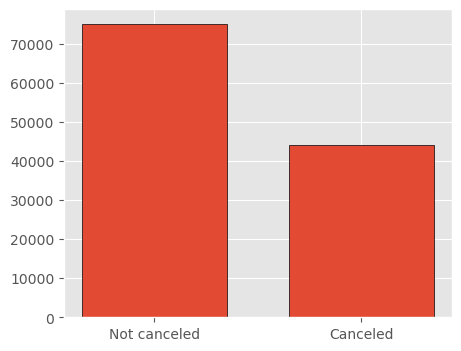

In [10]:
plt.figure(figsize=(5,4))
plt.bar(['Not canceled', 'Canceled'],hb.is_canceled.value_counts(),edgecolor='k',width = .7)
plt.show()

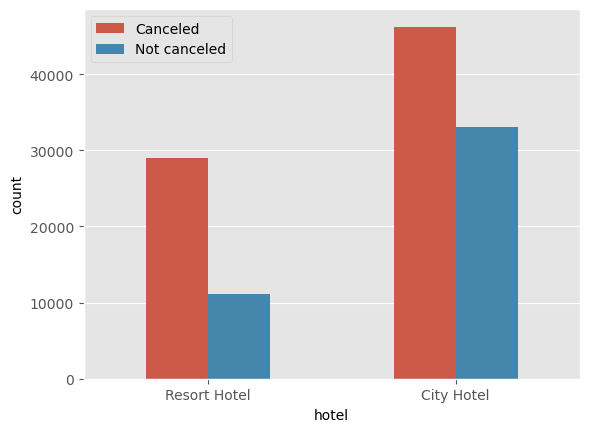

In [15]:
sns.countplot(x='hotel',hue='is_canceled',data=hb,width=.5)
plt.legend(['Canceled','Not canceled'])
plt.show()

The number reservations canceled is higher than the number of reservations that were not canceled in both City and Resort Hotels 

Reservations in City Hotels were canceled more frequently as compared to Resort Hotels - Average daily rate in City Hotels is higher than that in Resort Hotels

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [210]:
resort_hotel = hb[hb['hotel']=='Resort Hotel']
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = hb[hb['hotel']=='City Hotel']
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

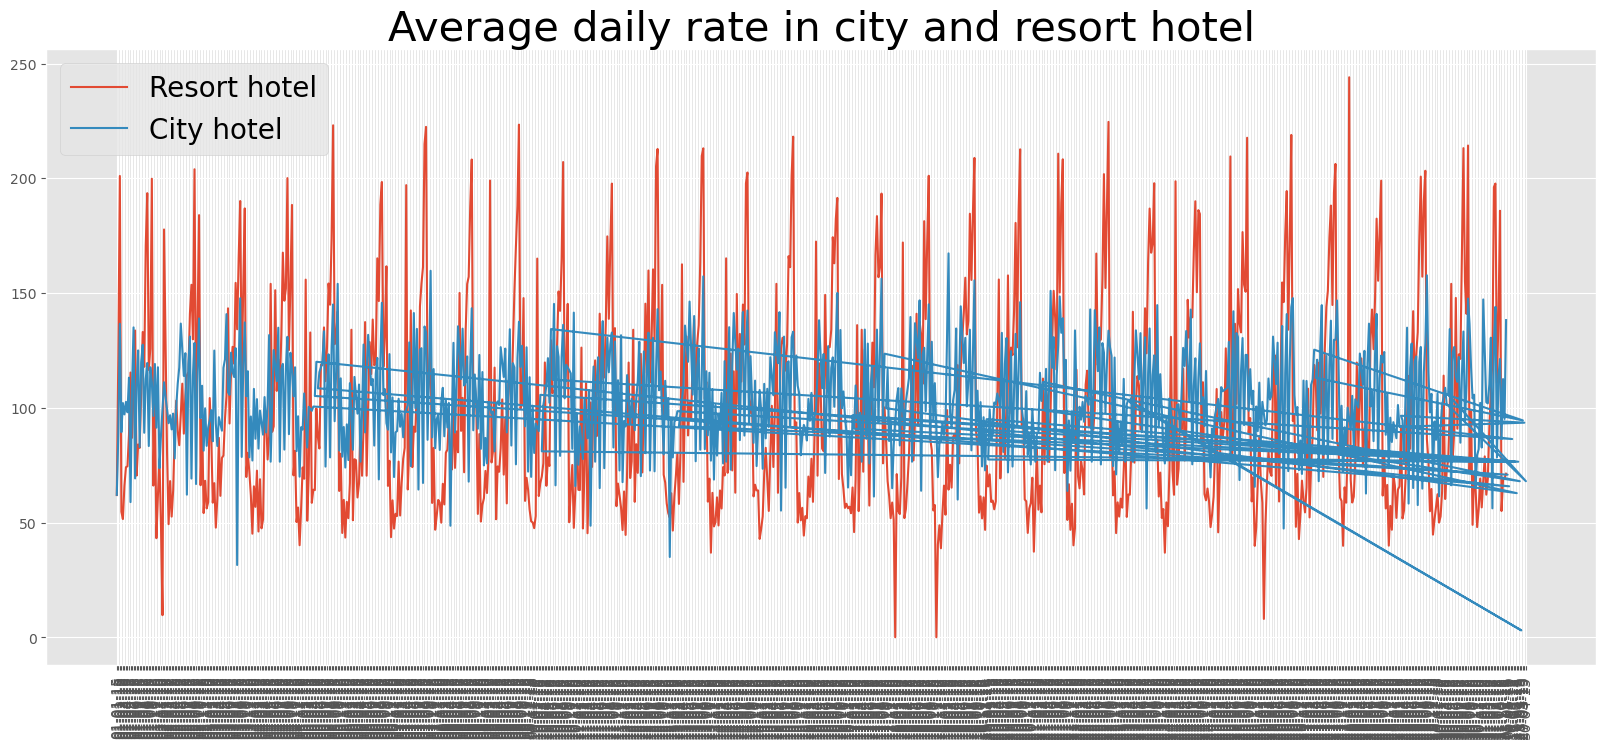

In [211]:
plt.figure(figsize = (20,8))
plt.title('average daily rate in city and resort hotel'.capitalize(),fontdict={'fontsize':30})
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City hotel')
plt.xticks(rotation='vertical')
plt.legend(fontsize=20)
plt.show()

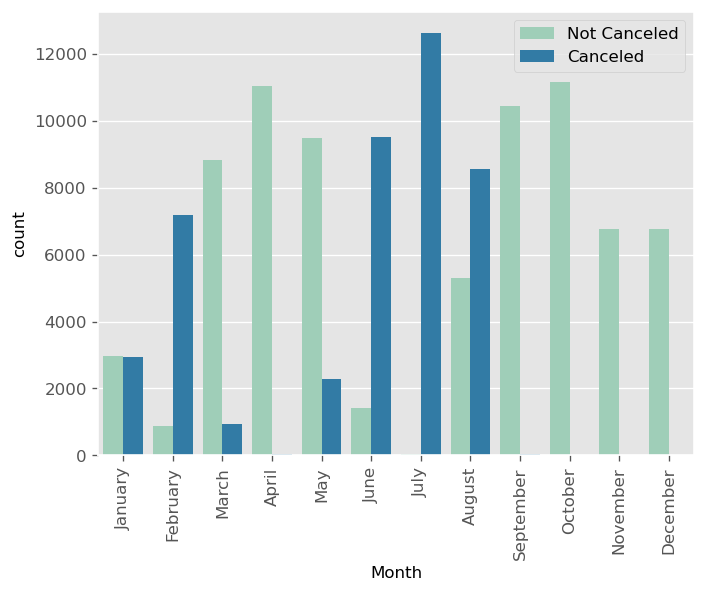

In [21]:
month_num_name_dict={
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}
def month_num_name_conv(dataframe,column):
    month_names = []
    month_nums=sorted(dataframe[column].dt.month)
    for num in month_nums:
        month_names.append(month_num_name_dict.get(num))
    return month_names    
hb['Month']= month_num_name_conv(hb,'Date')

plt.style.use('ggplot')
plt.figure(dpi=120)
sns.countplot(x = 'Month',hue='is_canceled',data=hb,palette='YlGnBu',width=.8)
plt.xticks(rotation='vertical')
plt.legend(['Not Canceled','Canceled'])
plt.show()

The number of reservations canceled is highest in the month of July and lowest in the last Quarter - ADR

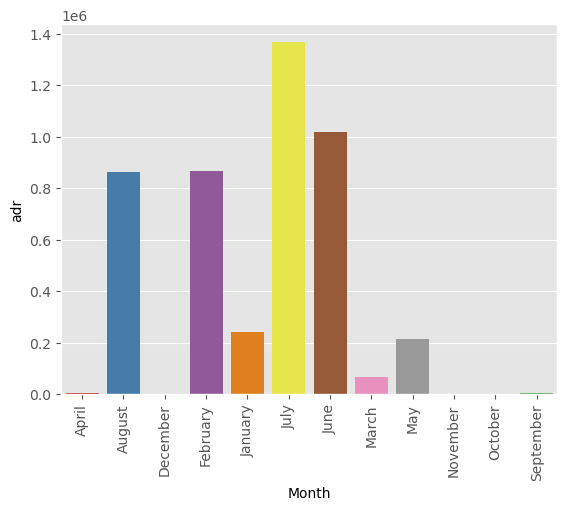

In [22]:
sns.barplot(x='Month',y='adr',data=hb[hb.is_canceled == 1].groupby('Month')[['adr']].sum().reset_index(),palette='Set1')
plt.xticks(rotation='vertical')
plt.show()

This shows that the number of reservations canceled is dependant on the avarage daily rate in a hotel

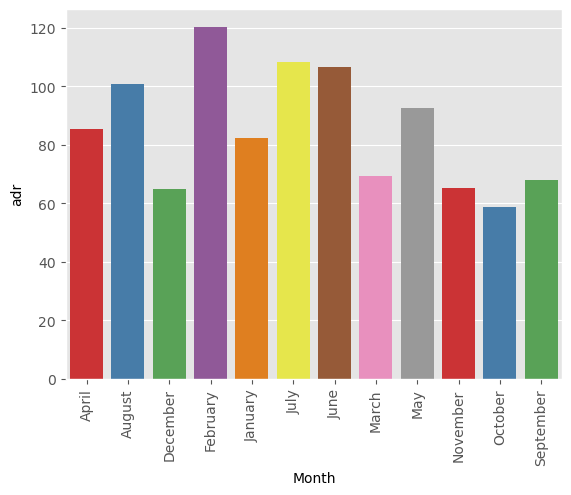

In [46]:
sns.barplot(x='Month',y='adr',data=hb[hb.is_canceled == 1].groupby('Month')[['adr']].mean().reset_index(),palette='Set1')
plt.xticks(rotation='vertical')
plt.show()

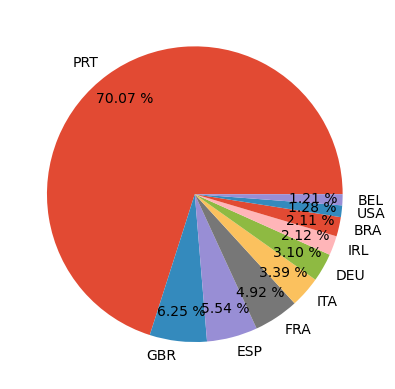

In [23]:
top_countries_cancel = hb[hb['is_canceled']==1]['country'].value_counts()
plt.pie(top_countries_cancel.values[:10],labels=top_countries_cancel.index[:10],autopct='%.2f %%',pctdistance=.8)
plt.show()

In [34]:
hb.market_segment.value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

Most of customers are coming from online travelling agent

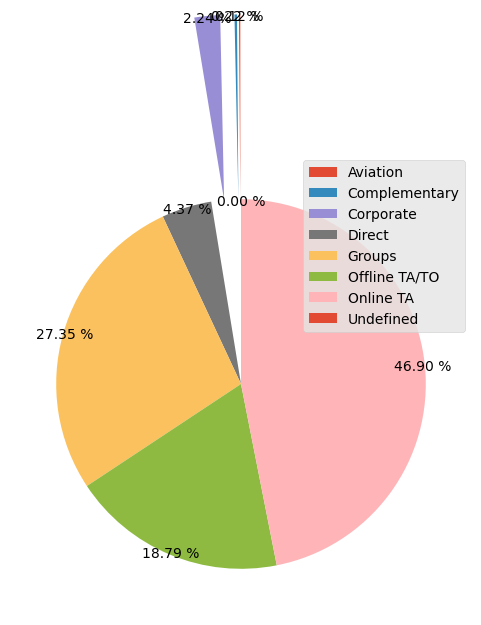

In [133]:
plt.figure(figsize=(14,6),dpi=100)
canceled_market = hb.select_dtypes('number').groupby(hb['market_segment']).sum()['is_canceled']
labels = [seg for seg, df in  hb.select_dtypes('number').groupby(hb['market_segment'])]

explode=[1,1,1,0,0,0,0,0]
plt.pie(canceled_market,autopct='%.2f %%',explode=explode,pctdistance=.99,radius=1,counterclock=True,
    startangle=90,rotatelabels=True)
plt.legend(labels,loc="upper right")
plt.show()
